In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv("G:/Titanic - capstone 1/train.csv",header = 'infer')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
#Data prep and cleaning

In [62]:
# Dropping unwanted columns

In [63]:
df_new = df.drop(columns=['Ticket','Fare','Cabin','Name','PassengerId'])

In [64]:
#Imputing Missing values of age

In [65]:
df_new.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [66]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    889 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [67]:
df_new.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [35]:
df_age = df.drop(columns=['Ticket','Fare','Cabin','Name','PassengerId','Sex','SibSp','Parch','Embarked','Pclass'])

In [36]:
df_age

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
...,...,...
886,0,27.0
887,1,19.0
888,0,NaN
889,1,26.0


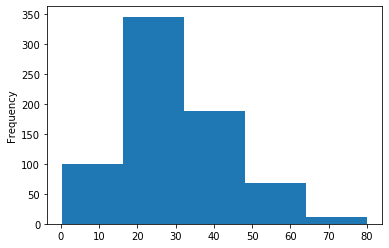

In [52]:
df_age['Age'].plot.hist(bins = 5)

In [68]:
df_new['Age'].fillna("9",limit = 25,inplace = True)
df_new['Age'].fillna("25",limit = 85,inplace = True)
df_new['Age'].fillna("40",limit = 48,inplace = True)
df_new['Age'].fillna("56",limit = 18,inplace = True)


In [71]:
df_new.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [70]:
df_new['Age'].fillna("73",inplace = True)

In [72]:
df_new['Embarked'].dropna()

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object

In [75]:
df_new.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [ ]:
#Here embarked 2 missing values is replaced by None

In [74]:
df_new['Embarked'].fillna("None",inplace = True)

In [76]:
df_new.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [ ]:
# All missing values are handled. 
# Next we go to handling categorical features

In [77]:
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22,1,0,S
1,1,1,female,38,1,0,C
2,1,3,female,26,0,0,S
3,1,1,female,35,1,0,S
4,0,3,male,35,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,S
887,1,1,female,19,0,0,S
888,0,3,female,73,1,2,S
889,1,1,male,26,0,0,C


In [82]:
df_new['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

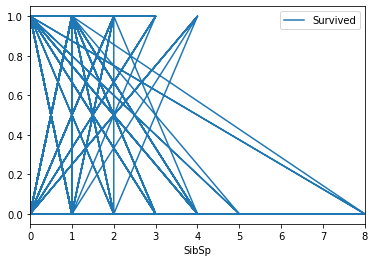

In [84]:
df_new.plot(x = 'SibSp', y = 'Survived')

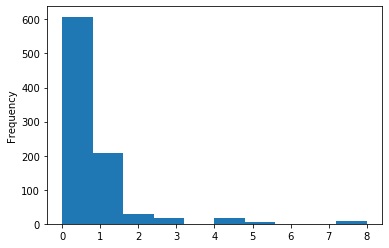

In [86]:
df_new['SibSp'].plot.hist(bins = 10)

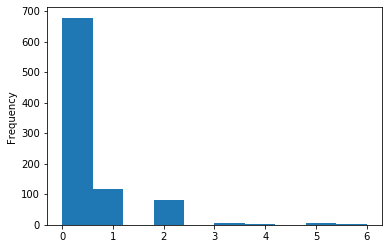

In [100]:
df_new['Parch'].plot.hist(bins = 10)

In [107]:
(df_new['Parch']>2).sum()

15

In [116]:
from sklearn.preprocessing import LabelBinarizer,LabelEncoder
lb = LabelBinarizer()
df_new['lb_sex'] = lb.fit_transform(df_new['Sex'])


In [117]:
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,lb_sex
0,0,3,male,22,1,0,S,1
1,1,1,female,38,1,0,C,0
2,1,3,female,26,0,0,S,0
3,1,1,female,35,1,0,S,0
4,0,3,male,35,0,0,S,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,S,1
887,1,1,female,19,0,0,S,0
888,0,3,female,73,1,2,S,0
889,1,1,male,26,0,0,C,1


In [119]:
le = LabelEncoder()
df_new['le_embarked'] = le.fit_transform(df_new['Embarked'])

In [120]:
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,lb_sex,le_embarked
0,0,3,male,22,1,0,S,1,3
1,1,1,female,38,1,0,C,0,0
2,1,3,female,26,0,0,S,0,3
3,1,1,female,35,1,0,S,0,3
4,0,3,male,35,0,0,S,1,3
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,S,1,3
887,1,1,female,19,0,0,S,0,3
888,0,3,female,73,1,2,S,0,3
889,1,1,male,26,0,0,C,1,0


In [121]:
df_new.corr()

,Survived,Pclass,SibSp,Parch,lb_sex,le_embarked
Survived,1.000000,-0.338481,-0.035322,0.081629,-0.543351,-0.174963
Pclass,-0.338481,1.000000,0.083081,0.018443,0.131900,0.197493
SibSp,-0.035322,0.083081,1.000000,0.414838,-0.114631,0.068043
Parch,0.081629,0.018443,0.414838,1.000000,-0.245489,0.032517
lb_sex,-0.543351,0.131900,-0.114631,-0.245489,1.000000,0.106395
le_embarked,-0.174963,0.197493,0.068043,0.032517,0.106395,1.000000


C:\Users\Balamre\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Balamre\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


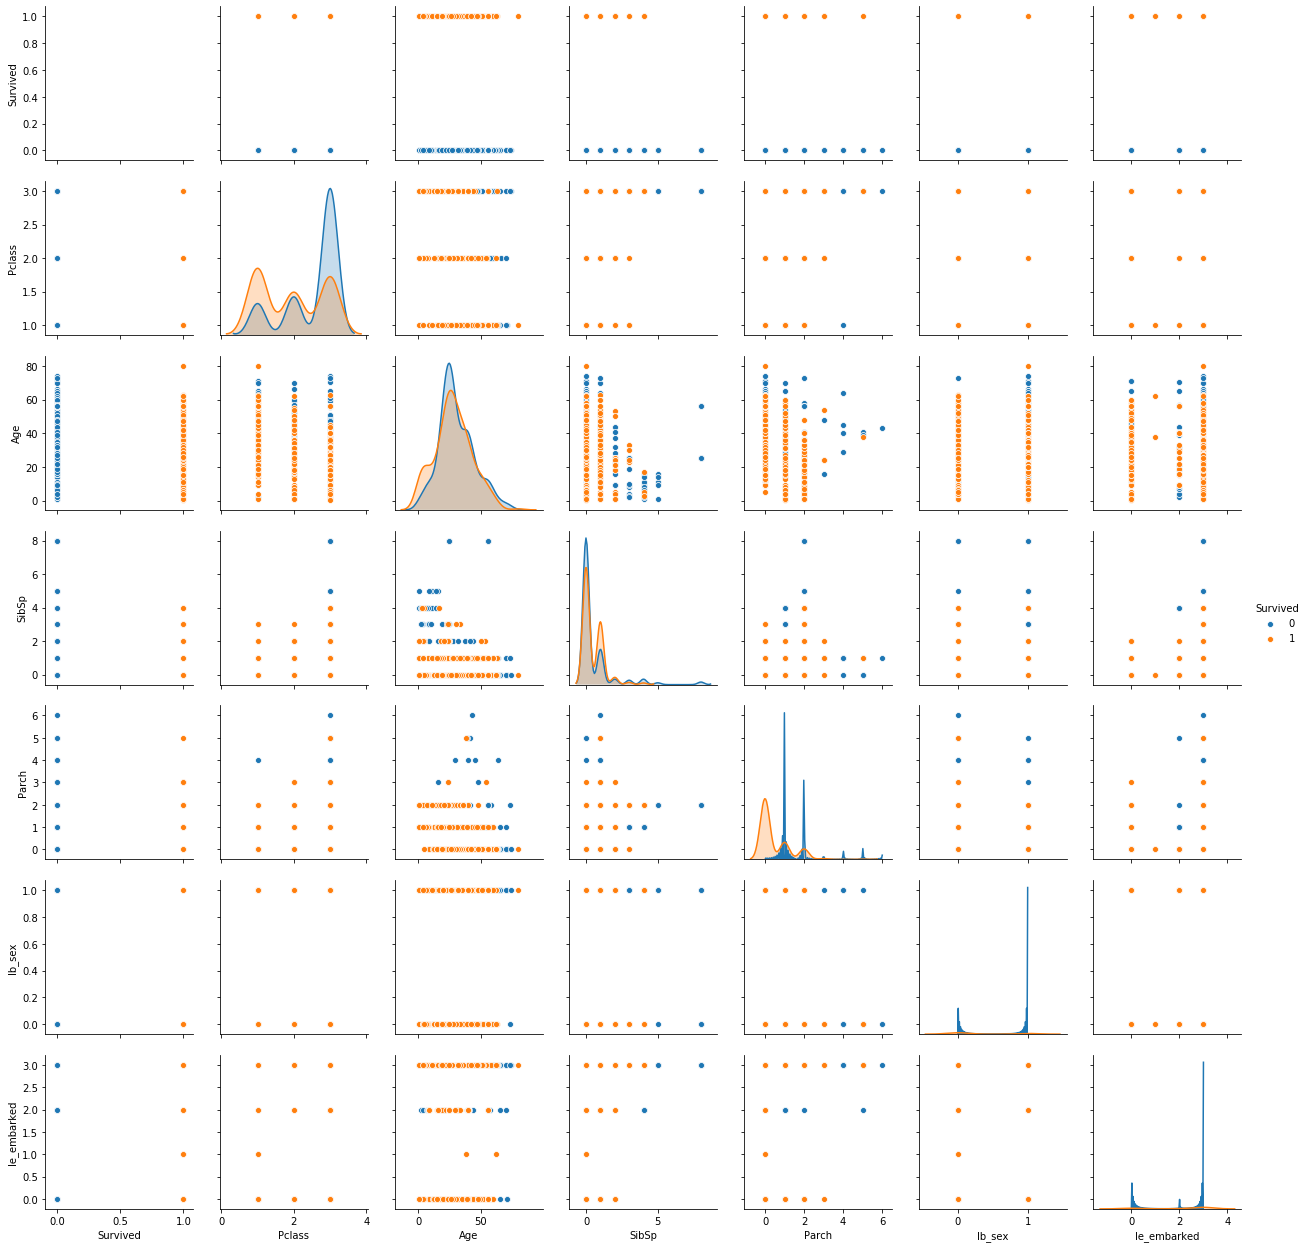

In [125]:
sns.pairplot(df_new, hue = 'Survived')

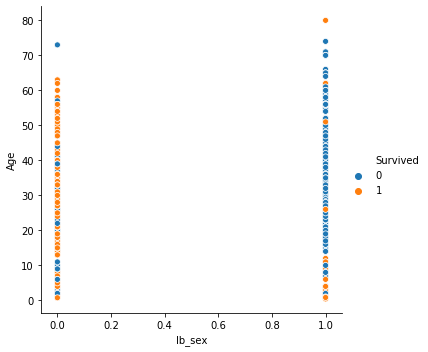

In [130]:
sns.relplot(x="lb_sex", y="Age", hue = 'Survived',data = df_new)

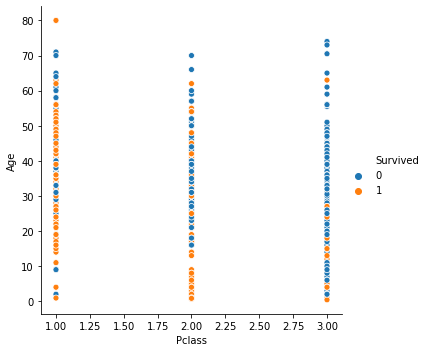

In [131]:
sns.relplot(x="Pclass", y='Age', hue= 'Survived', data= df_new)

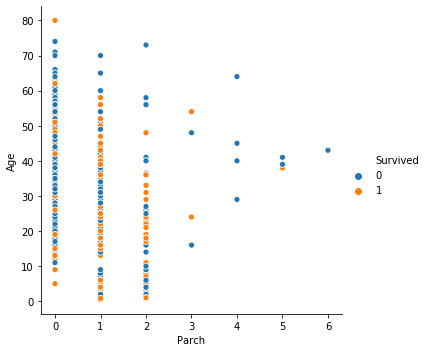

In [132]:
sns.relplot(x="Parch",y="Age", hue = 'Survived', data =df_new)

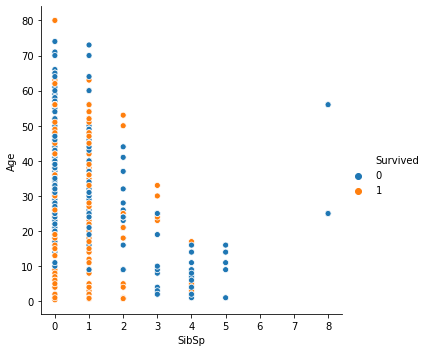

In [133]:
sns.relplot(x="SibSp",y="Age", hue = 'Survived', data =df_new)

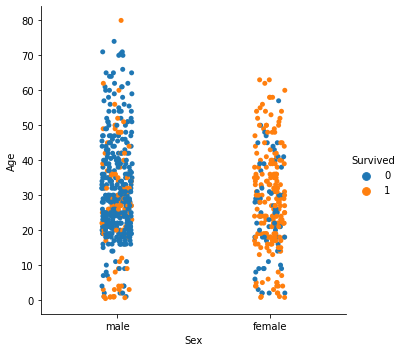

In [137]:
sns.catplot(x="Sex",y="Age", hue = 'Survived', data =df)

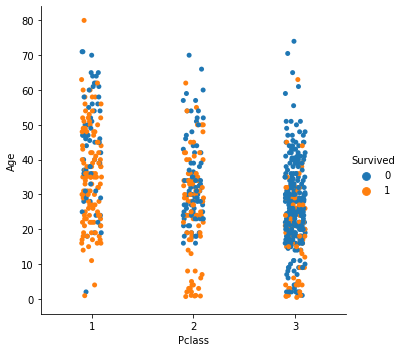

In [138]:
sns.catplot(x="Pclass",y="Age", hue = 'Survived', data =df)

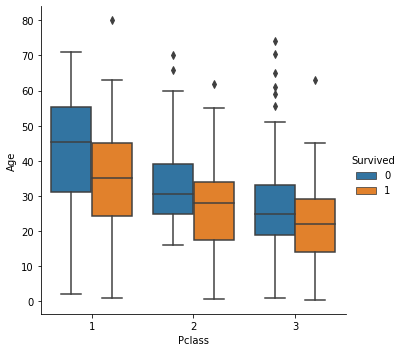

In [140]:
sns.catplot(x="Pclass",y="Age", hue='Survived', kind='box', data =df)

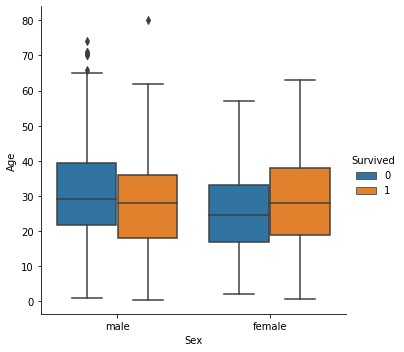

In [141]:
sns.catplot(x="Sex",y="Age", hue='Survived', kind='box', data =df)

In [142]:
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,lb_sex,le_embarked
0,0,3,male,22,1,0,S,1,3
1,1,1,female,38,1,0,C,0,0
2,1,3,female,26,0,0,S,0,3
3,1,1,female,35,1,0,S,0,3
4,0,3,male,35,0,0,S,1,3
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,S,1,3
887,1,1,female,19,0,0,S,0,3
888,0,3,female,73,1,2,S,0,3
889,1,1,male,26,0,0,C,1,0


In [276]:
from sklearn.model_selection import train_test_split 

In [278]:
from sklearn import linear_model
from sklearn.metrics import *

In [288]:
X = df_new.drop(columns = ['Sex','Embarked','Survived','Age','SibSp','Parch','le_embarked','Pclass'])
Y = df_new['Survived']

In [312]:
#Standardising all columns

In [313]:
X = df_new.drop(columns = ['Sex','Embarked','Survived'])
Y = df_new['Survived']

In [314]:
 from sklearn.preprocessing import StandardScaler

In [315]:
scaler = StandardScaler(copy=False)
scaler.fit(X)

StandardScaler(copy=False, with_mean=True, with_std=True)

In [316]:
X

,Pclass,Age,SibSp,Parch,lb_sex,le_embarked
0,3,22,1,0,1,3
1,1,38,1,0,0,0
2,3,26,0,0,0,3
3,1,35,1,0,0,3
4,3,35,0,0,1,3
...,...,...,...,...,...,...
886,2,27,0,0,1,3
887,1,19,0,0,0,3
888,3,73,1,2,0,3
889,1,26,0,0,1,0


In [317]:
scaler.transform(X)

array([[ 0.82737724, -0.54541782,  0.43279337, -0.47367361,  0.73769513,
         0.56273365],
       [-1.56610693,  0.57268491,  0.43279337, -0.47367361, -1.35557354,
        -2.00852627],
       [ 0.82737724, -0.26589214, -0.4745452 , -0.47367361, -1.35557354,
         0.56273365],
       ...,
       [ 0.82737724,  3.01853465,  0.43279337,  2.00893337, -1.35557354,
         0.56273365],
       [-1.56610693, -0.26589214, -0.4745452 , -0.47367361,  0.73769513,
        -2.00852627],
       [ 0.82737724,  0.15339639, -0.4745452 , -0.47367361,  0.73769513,
        -0.29435299]])

In [318]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

In [ ]:
#Logistic REgression

In [ ]:
logreg = linear_model.LogisticRegression()

In [384]:
logreg.fit(X_train, Y_train)

C:\Users\Balamre\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [385]:
logreg.predict(X_test)

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1], dtype=int64)

In [386]:
logreg.score(X_test, Y_test) * 100

79.1044776119403

In [ ]:
#Random Forest

In [329]:
from sklearn.ensemble import RandomForestClassifier

In [258]:
rf = RandomForestClassifier(max_depth = 50,random_state = 0,oob_score=True, max_features = 0.33)

In [259]:
rf.fit(X,Y)

C:\Users\Balamre\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Balamre\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Balamre\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features=0.33, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [332]:
rf.predict(X_test)

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)

In [340]:
rf.score(X_test,Y_test)*100

93.65671641791045

In [262]:
rf.oob_score_

0.7721661054994389

In [342]:
#SVM 

In [343]:
from sklearn import svm

In [344]:
support_Vector = svm.SVC()

In [345]:
support_Vector.fit(X_train,Y_train)

C:\Users\Balamre\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [346]:
support_Vector.predict(X_test)

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1], dtype=int64)

In [348]:
support_Vector.score(X_test, Y_test)*100

76.86567164179104

In [349]:
#SGDClassifier

In [353]:
from sklearn.linear_model import SGDClassifier

In [355]:
sgd = SGDClassifier()

In [356]:
sgd.fit(X_train,Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [357]:
sgd.predict(X_test)

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1], dtype=int64)

In [358]:
sgd.score(X_test, Y_test)*100

72.38805970149254

In [382]:
sgd.decision_function(X_test)

array([ -327.67903341,  -642.25661485,  -293.5689653 ,   455.28433858,
        -131.27925428,  -127.42134889,   -55.10402881,    39.99260289,
         -66.31330545,   -37.96800819,  -475.43165627,  -203.82480922,
        -392.46828428,   239.10175069,   273.96646632,    24.27016593,
        -395.87708237,  -242.93027581,  -569.79204647,    10.88698905,
        -174.69173357,   205.76841736,  -841.74860823,  -127.42134889,
         -91.67314347,   -11.66578106,  -526.31330545,   -91.67314347,
          -4.10089978,    54.61804003,  -443.62234281,  -348.75394598,
        -468.34165075,   104.46526992,  -518.91039729,  -131.6878683 ,
        -685.73535588,  -319.62087033,  -276.1421293 ,  -696.4366259 ,
        -591.23507979,  -327.67903341,  -642.25661485,  -427.41398647,
         -18.7152933 ,  -192.97629091,  -642.25661485,   253.43269124,
        -479.04292076,  -572.4756467 ,  -344.81505402,   -18.92144092,
         264.17445454,  -337.90542766,  -479.51779652,  -333.80088137,
      

In [360]:
#Perceptron

In [361]:
from sklearn.linear_model import Perceptron

In [376]:
percep = Perceptron(alpha = 10)

In [377]:
percep.fit(X_train,Y_train)

Perceptron(alpha=10, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [378]:
percep.predict(X_test)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [379]:
percep.score(X_test,Y_test)*100

36.940298507462686

In [381]:
percep.decision_function(X_test)

array([ 362. ,  959. ,  -40. ,  409. , 1011. ,  677. , 1496. , 1386. ,
        520. ,  731. ,  529. , 1412. ,  460. ,  582. ,  869. ,  548. ,
        449. ,  483. ,  809. , -295.4,  383. ,  956. , 1390. ,  677. ,
        788. , 1419. ,  719. ,  788. , 1042. ,  318. ,  602. , 1712. ,
        599. ,  197. ,  619. ,  740. , 1049. ,  683. ,  593. , 1463. ,
       1650. ,  362. ,  959. ,  219. , 1336. ,   29. ,  959. ,  829. ,
       1013. , 1557. , 1127. ,  550. ,  402. ,  329. , 1460. ,  543. ,
       1787. ,  578. ,  189. ,  440. ,  272. , 1318. , 1759. ,  980. ,
       1098. ,  670. , 1766. ,  763. ,  342. ,  866. ,  922. , 1357. ,
        610. ,   29. ,  494. , 1082. ,  627. ,  980. ,  779. ,  446. ,
        900. ,   99. , 1062. ,  239. , 1223. ,  926. , 1409. , 2018. ,
       1232. ,  310. , 1607. ,  329. ,    3. , 1549. ,  528. ,  362. ,
       1092. ,  279. , 1727. ,  590. ,  289. , 1453. ,  329. ,  369. ,
       1068. , 1248. , 1052. , 1758. ,  583. , 1269. , 1199. , 1036. ,
      

In [387]:
#Model scores are as follows:
#Random forest -       93.65
#Logistic Regression - 79.10
#SVM -                 76.86
#SGDClassifier -       72.38
#Perceptron -          36.94

